In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

# xgb_model = XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',   # add this
#     random_state=42
# )

In [28]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [29]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [31]:
data.shape
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [32]:
data['TotalCharges'].unique()[:20]
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.isnull().sum()
data = data.dropna(subset = ['TotalCharges'])
data = data.drop(['customerID'], axis = 1)
data.shape

(7032, 20)

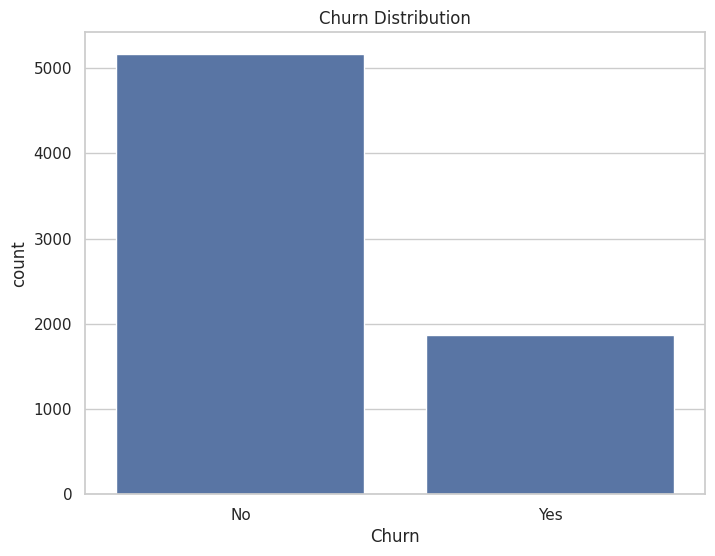

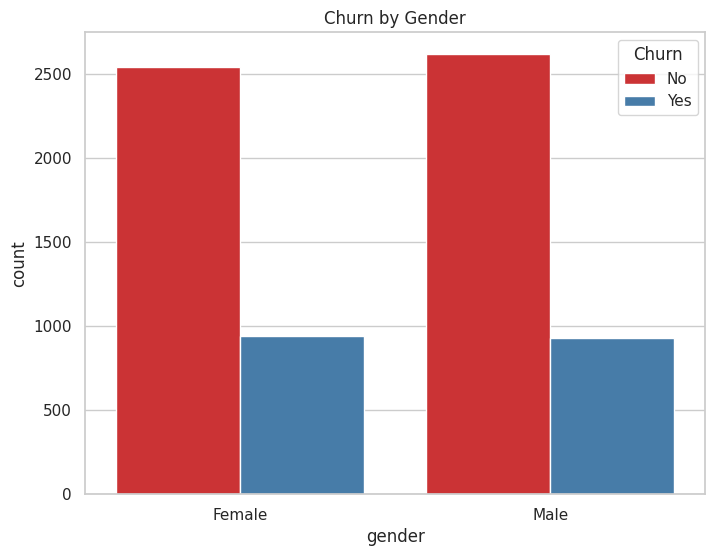

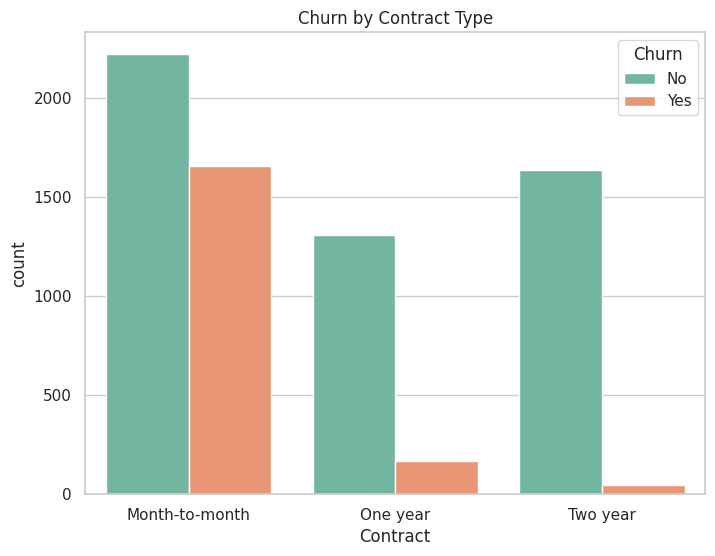

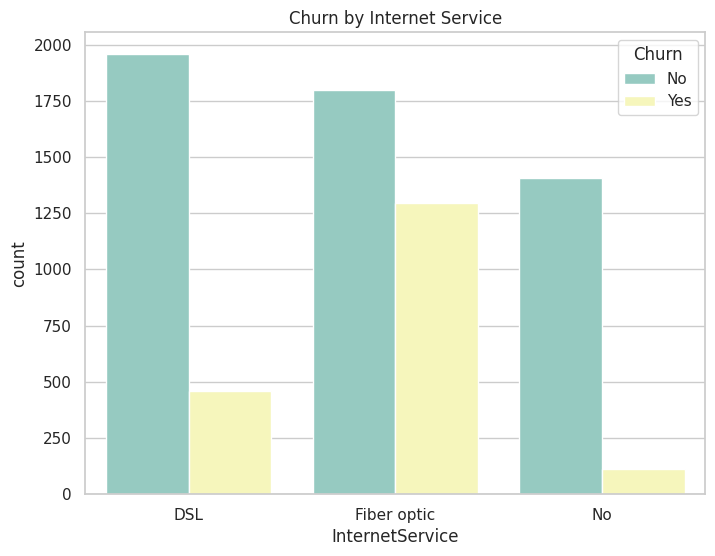

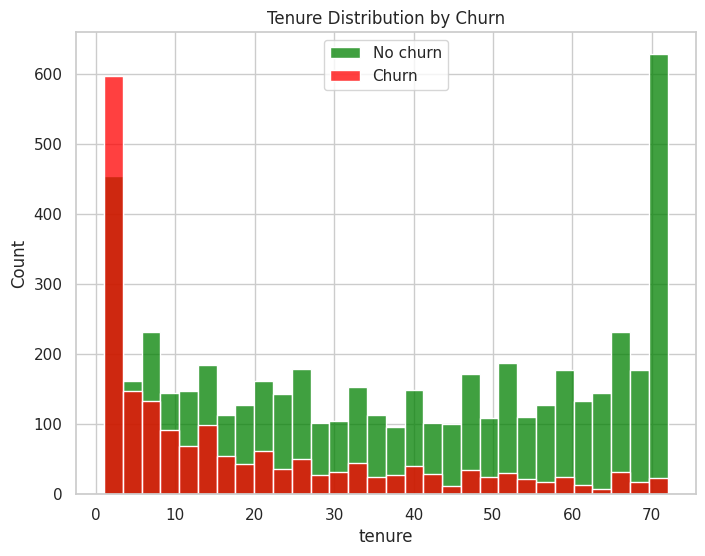

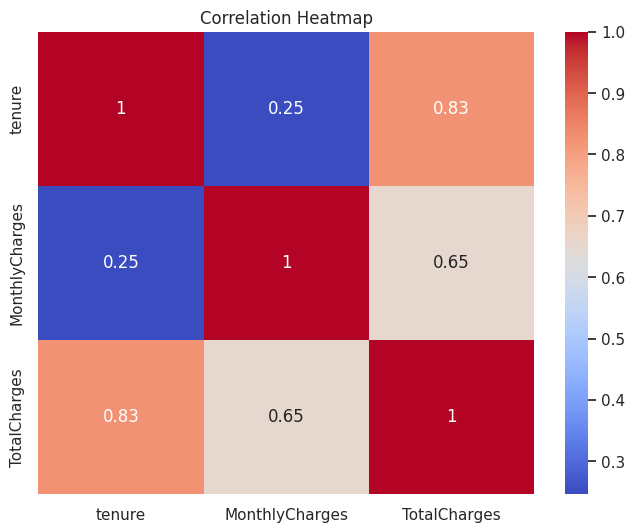

In [34]:
sns.set(style="whitegrid")

# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Churn by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set1')
plt.title('Churn by Gender')
plt.show()

# Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()

# Churn by Internet Service
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='Set3')
plt.title('Churn by Internet Service')
plt.show()

# Distribution of Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Churn'] == "No"]['tenure'], bins = 30, kde = False, color = "green", label = 'No churn')
sns.histplot(data[data['Churn'] == "Yes"]['tenure'], bins = 30, kde = False, color = "red", label = 'Churn')
plt.title('Tenure Distribution by Churn')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

PREPROCESSING DATA


In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Convert TotalCharges to numeric (sometimes it's object type)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values (if any remain after conversion)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# 2. Encode target column (Churn: Yes=1, No=0)
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})

# 3. Identify categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns.drop('Churn')

print("Categorical Columns:", cat_cols.tolist())
print("Numerical Columns:", num_cols.tolist())

# 4. One-Hot Encode categorical features
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# 5. Scale numerical features
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Final shape
print("Final Dataset Shape:", data_encoded.shape)

# 6. Split into X, y
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Final Dataset Shape: (7032, 31)
Features Shape: (7032, 30)
Target Shape: (7032,)


/tmp/ipython-input-1547190914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


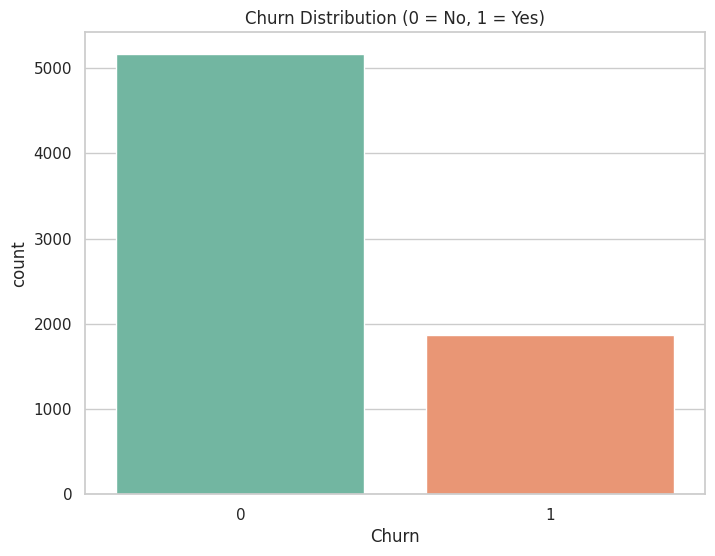

Churn Rate: 26.58%


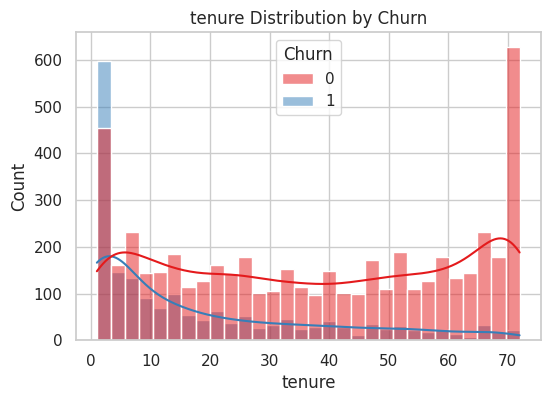

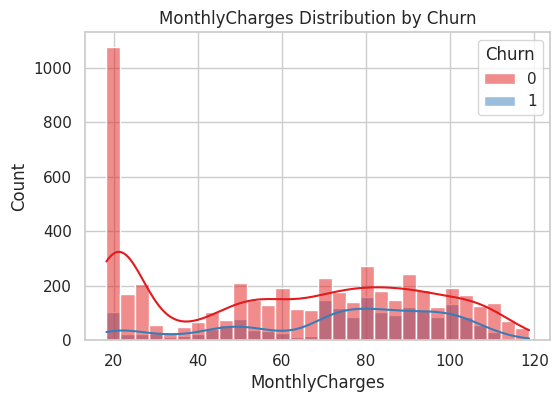

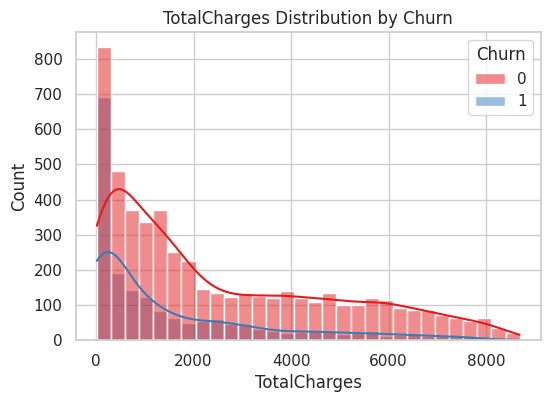

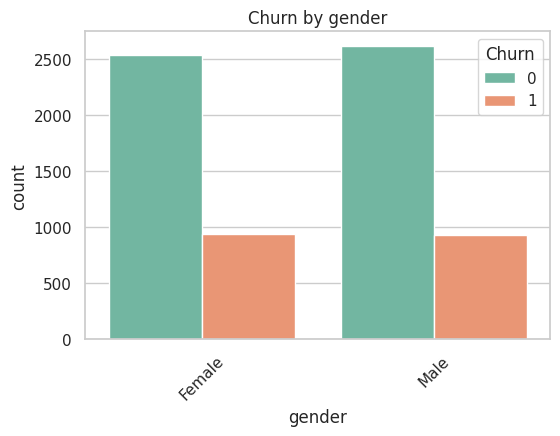

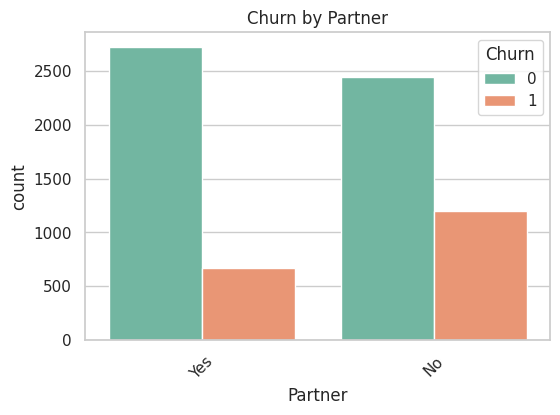

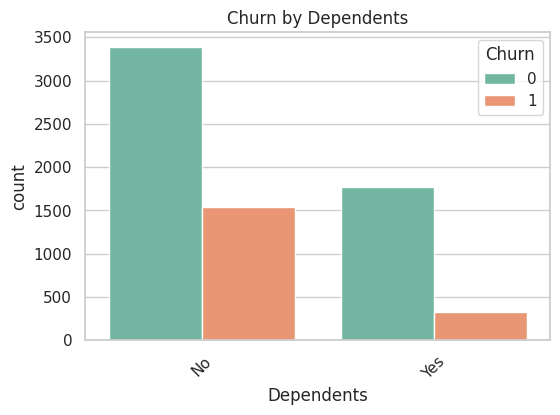

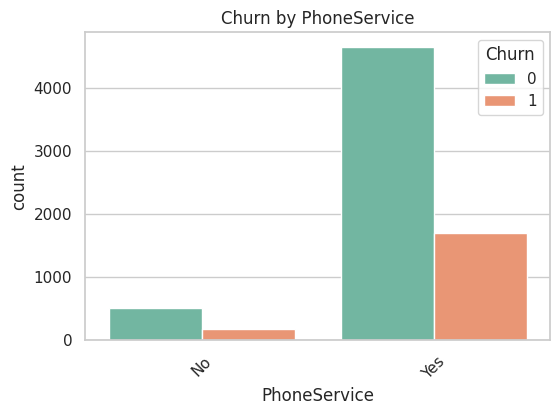

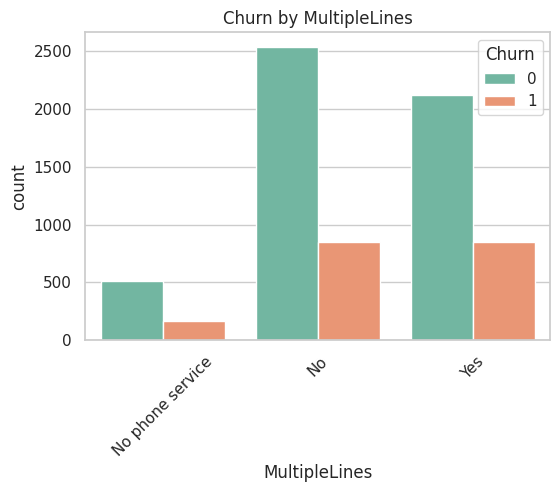

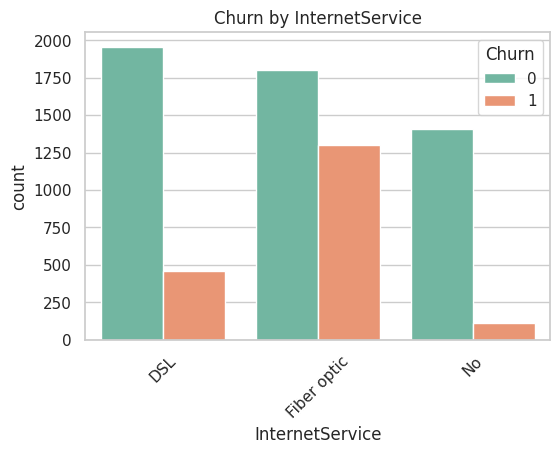

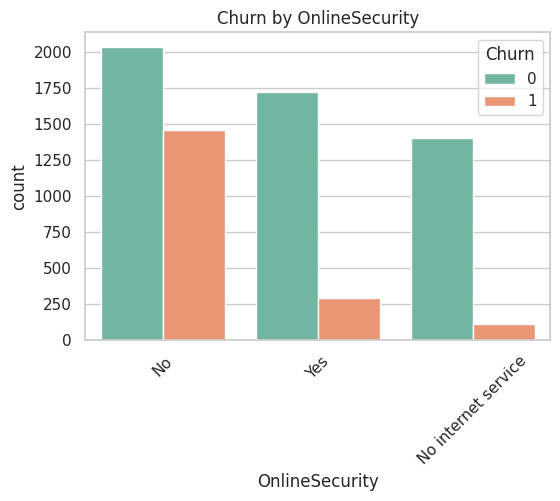

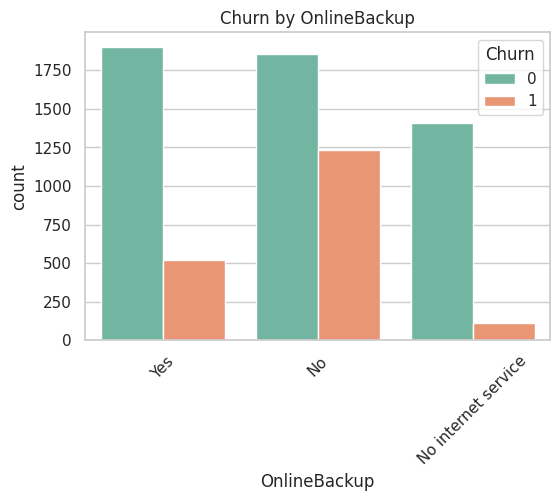

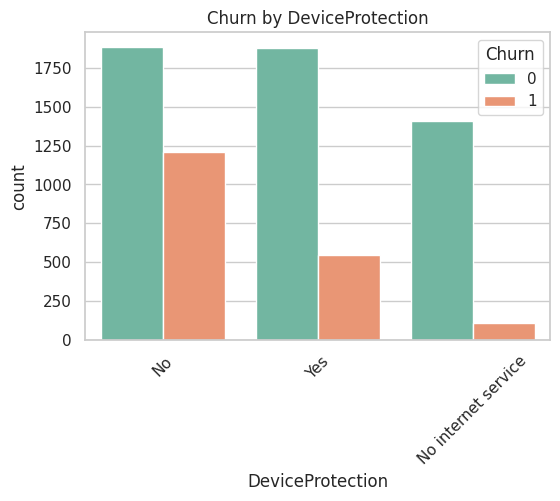

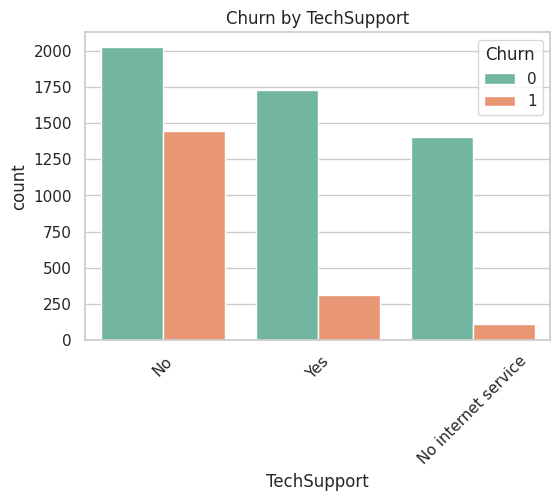

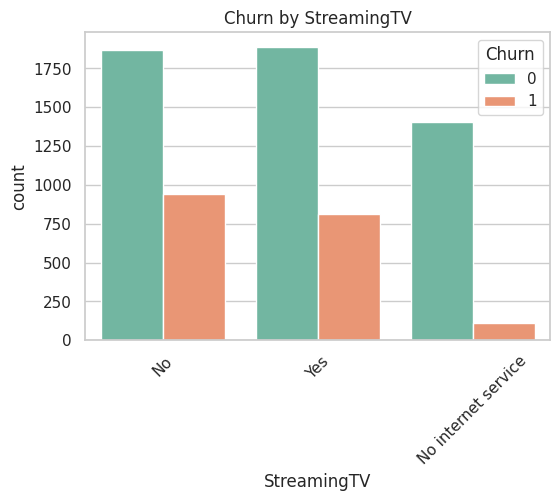

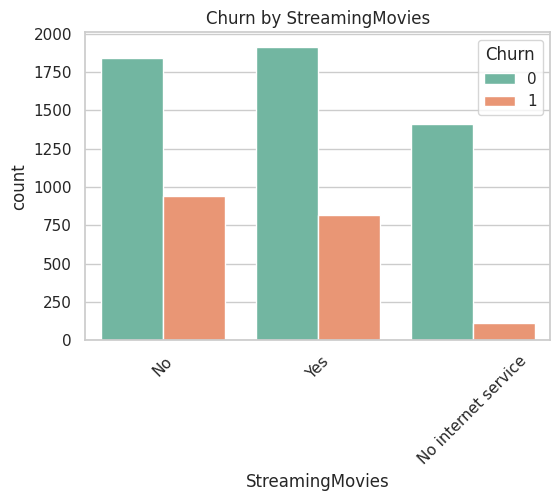

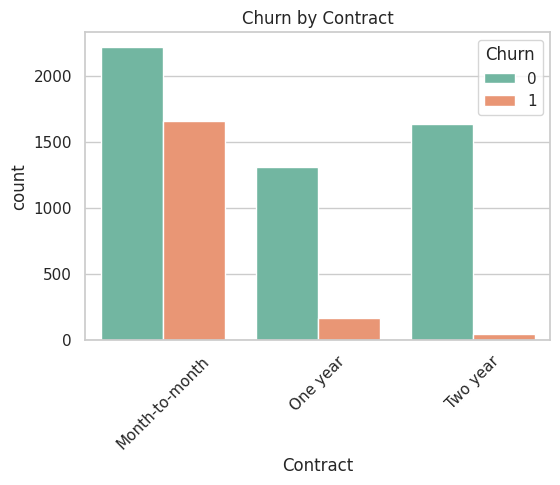

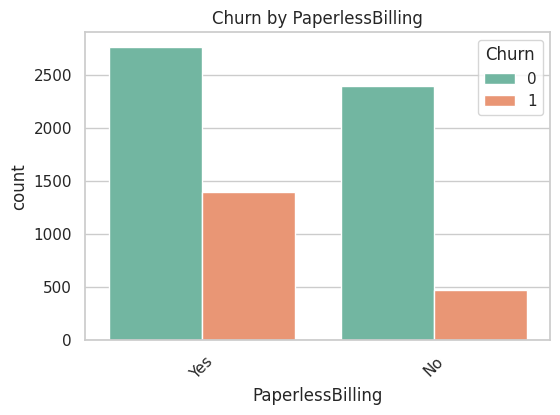

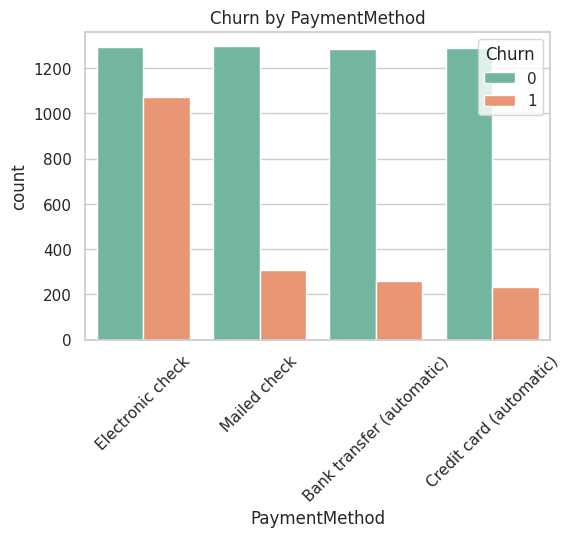

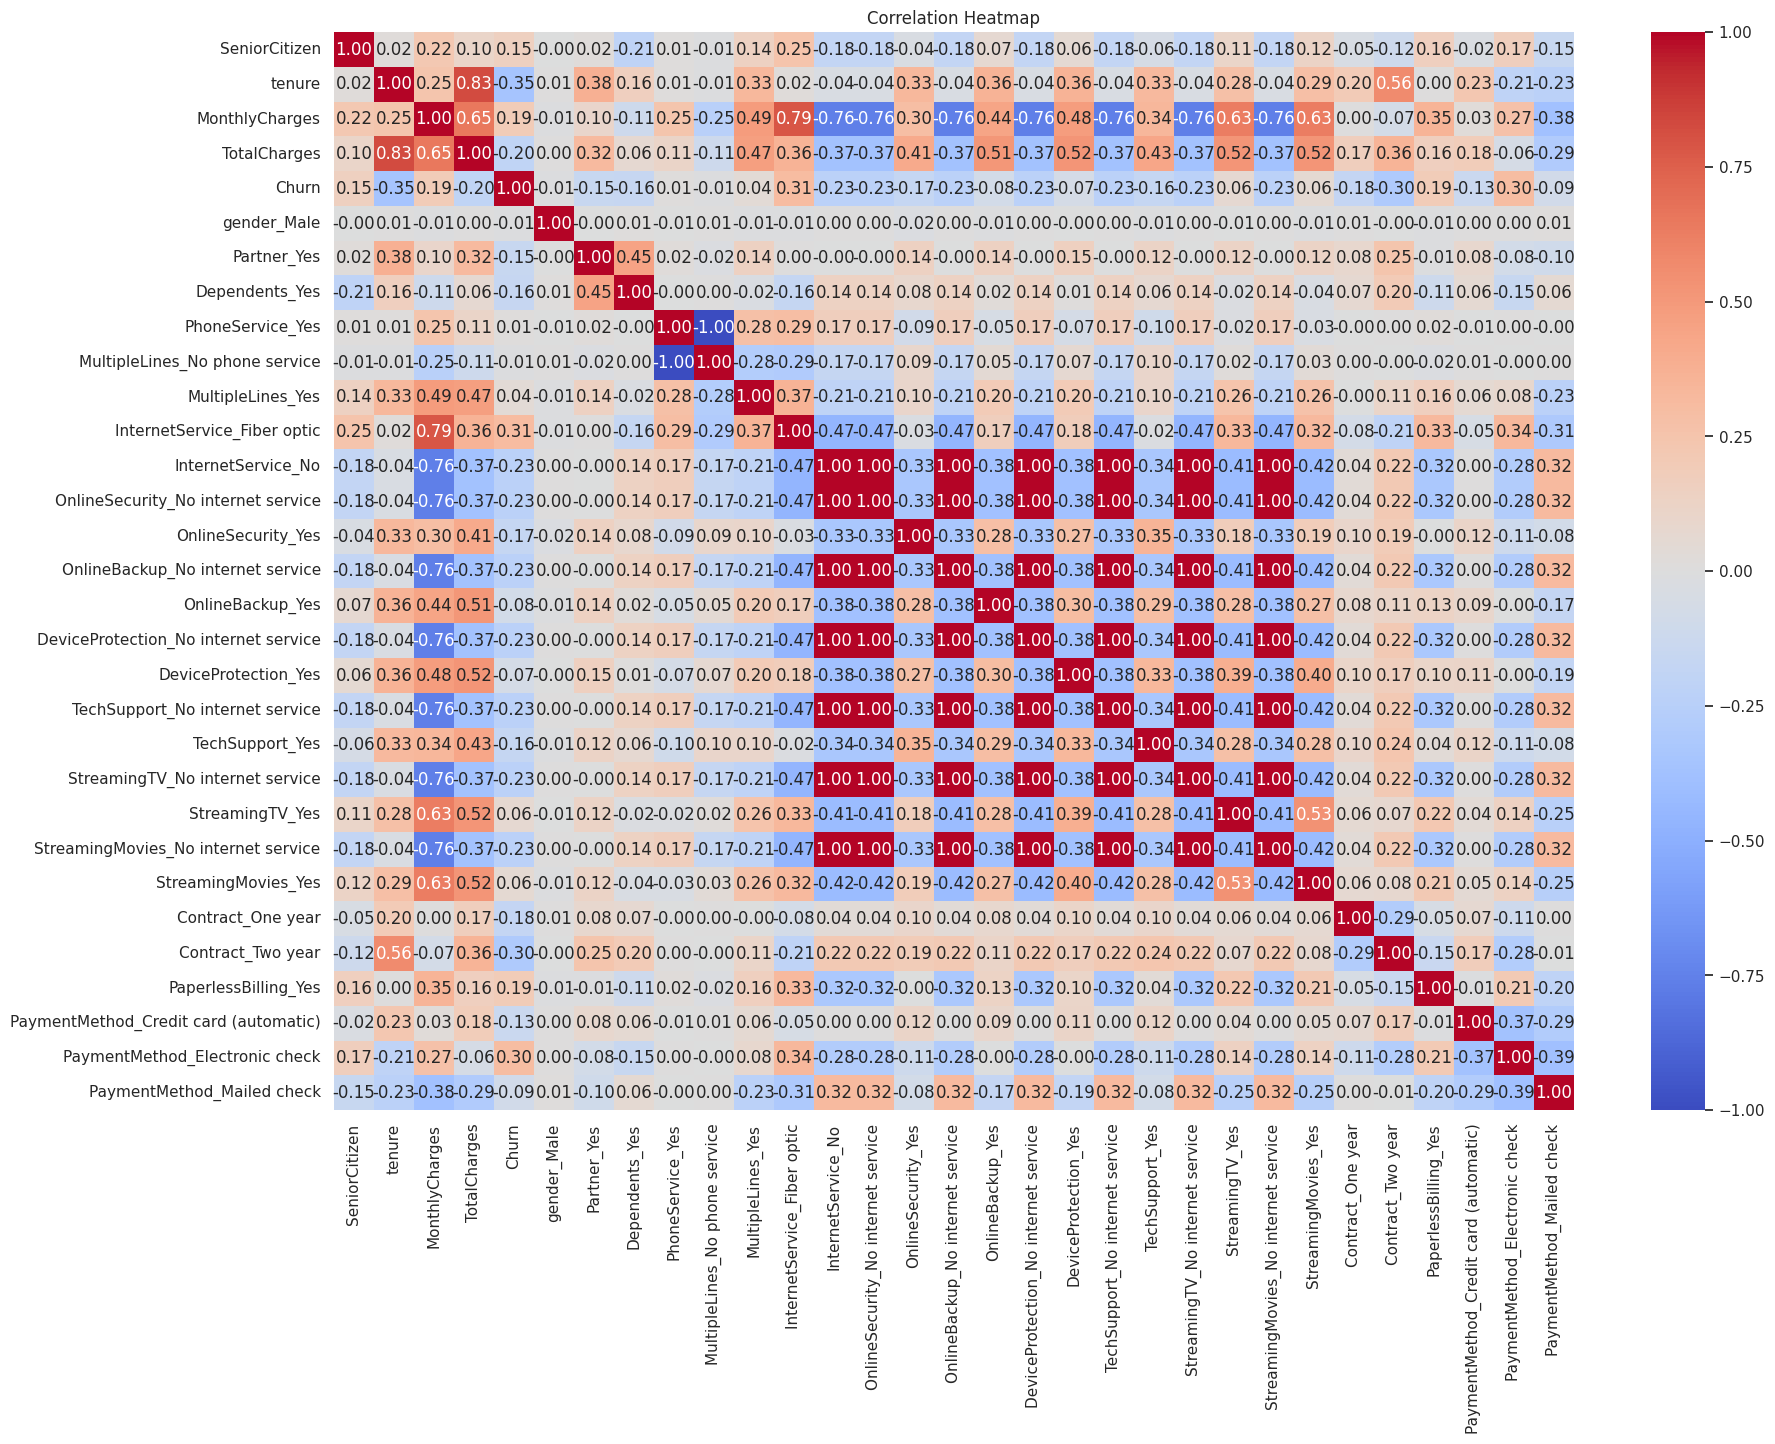

In [36]:
# Plot churn distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

# Print churn percentage
churn_rate = data['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# Plot distribution of numerical features by churn
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue='Churn', kde=True, bins=30, palette='Set1')
    plt.title(f"{col} Distribution by Churn")
    plt.show()

# Plot categorical features against churn
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling', 'PaymentMethod']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=data, palette='Set2')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix for numerical values
plt.figure(figsize=(20,14))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Base Model - LOGISTIC REGRESSION

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

log_reg = LogisticRegression(max_iter = 1000, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8031272210376688

Confusion matrix:
 [[917 116]
 [161 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



Random Forest Accuracy: 0.7903340440653873
ROC-AUC Score: 0.8191084583089594

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



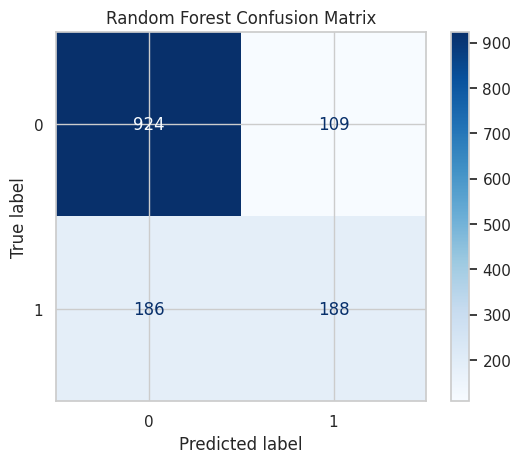

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:19:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7782515991471215
ROC-AUC Score: 0.8196701368217795

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



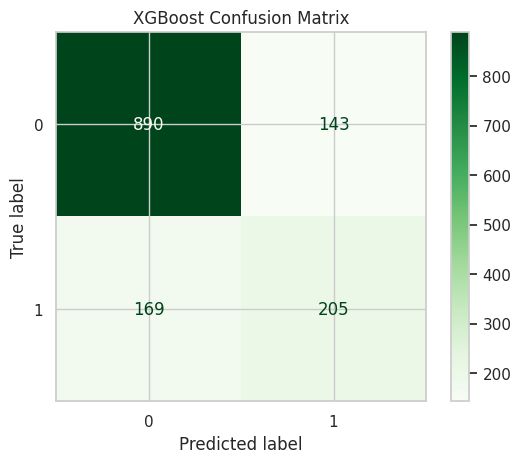

In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

disp = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to evaluate a model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

# Collect results
results = []
results.append(evaluate_model("Logistic Regression", log_reg, X_test, y_test))
results.append(evaluate_model("Random Forest", rf, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb, X_test, y_test))

# Create DataFrame
results_df = pd.DataFrame(results)

print("\n📊 Model Comparison Table:\n")
print(results_df)



📊 Model Comparison Table:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.803127   0.647416  0.569519  0.605974  0.836219
1        Random Forest  0.790334   0.632997  0.502674  0.560358  0.819108
2              XGBoost  0.778252   0.589080  0.548128  0.567867  0.819670


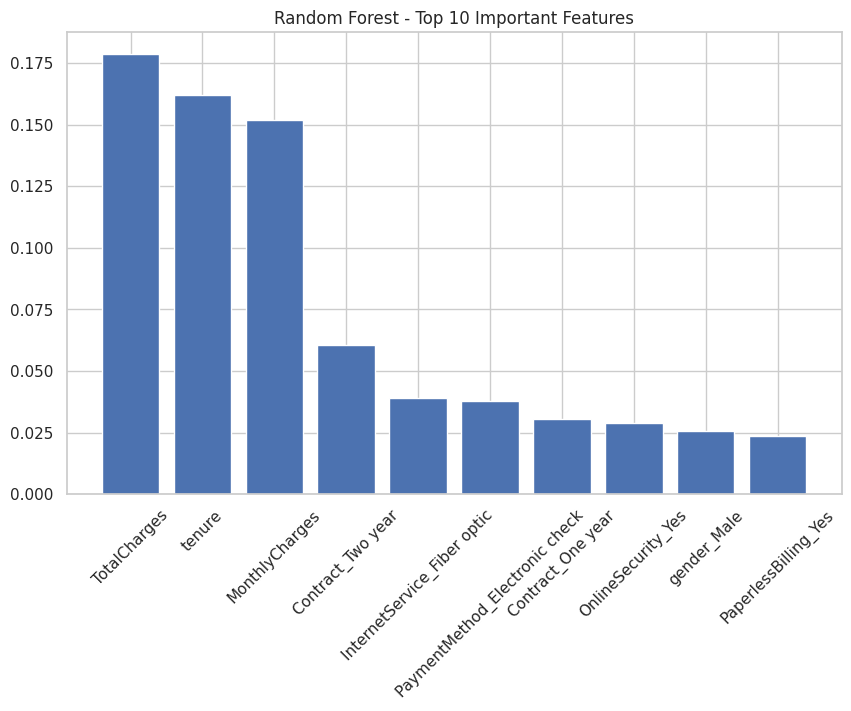

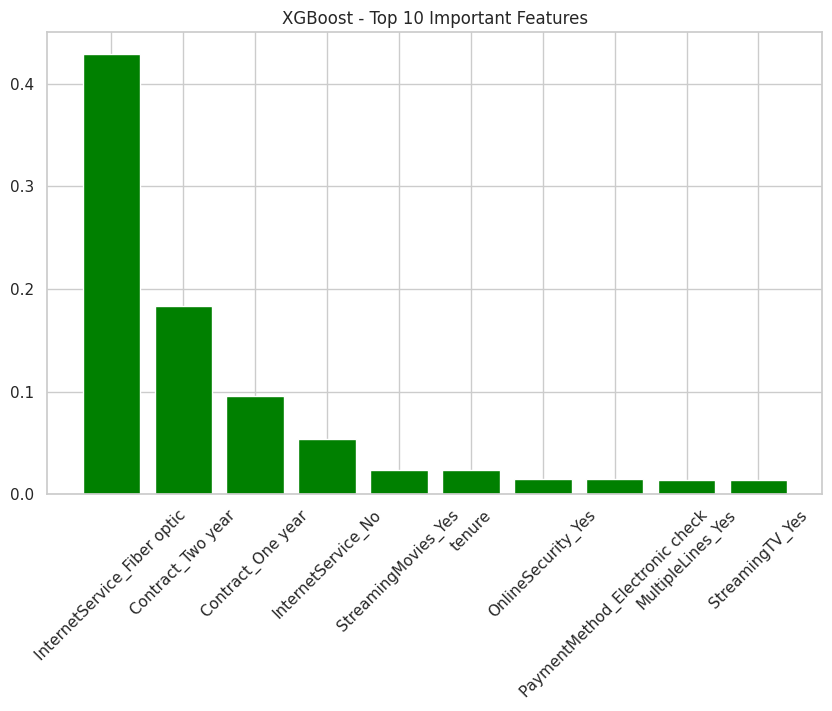

In [41]:
rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random Forest - Top 10 Important Features")
plt.bar(range(10), rf_importances[rf_indices[:10]], align='center')
plt.xticks(range(10), X_train.columns[rf_indices[:10]], rotation=45)
plt.show()

xgb_importances = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost - Top 10 Important Features")
plt.bar(range(10), xgb_importances[xgb_indices[:10]], align='center', color='green')
plt.xticks(range(10), X_train.columns[xgb_indices[:10]], rotation=45)
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

# 2. Train XGBoost on balanced data
xgb_smote = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# 3. Predictions
y_pred_smote = xgb_smote.predict(X_test)
y_prob_smote = xgb_smote.predict_proba(X_test)[:,1]

# 4. Evaluation
print("XGBoost (with SMOTE) Accuracy:", accuracy_score(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


# Train random forest on smote
rf_smote = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_smote.fit(X_train_smote, y_train_smote)
rf_y_pred_smote = rf_smote.predict(X_test)
rf_y_prob_smote = rf_smote.predict_proba(X_test)[:,1]

print("Random Forest (with SMOTE) Accuracy: ", accuracy_score(y_test, rf_y_pred_smote))
print("ROC-AUC Score: ", roc_auc_score(y_test, rf_y_prob_smote))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred_smote))

Before SMOTE: [4130 1495]
After SMOTE: [4130 4130]
XGBoost (with SMOTE) Accuracy: 0.7611940298507462
ROC-AUC Score: 0.8097566404895145

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407

Random Forest (with SMOTE) Accuracy:  0.7640369580668088
ROC-AUC Score:  0.814678445522361

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



HYPERPARAMETER TUNING

In [43]:
from xgboost import XGBClassifier
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,4,5,6,8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,                # number of parameter settings to try
    scoring='roc_auc',        # optimize for AUC
    cv=3,                     # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_smote, y_train_smote)   # use SMOTE balanced data

print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
Best ROC-AUC Score: 0.9024355164353391


In [44]:
best_params = {
    'subsample': 0.8,
    'n_estimators': 300,
    'min_child_weight': 1,
    'max_depth': 5,
    'learning_rate': 0.2,
    'gamma': 0,
    'colsample_bytree': 0.6
}

final_xgb = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Fit on SMOTE-balanced training data
final_xgb.fit(X_train_smote, y_train_smote)

# ✅ Step 2: Evaluate on original test set
y_pred = final_xgb.predict(X_test)
y_pred_proba = final_xgb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 3: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.759772565742715
ROC-AUC Score: 0.8106988108981161

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.77      1407


Confusion Matrix:
 [[834 199]
 [139 235]]


EXPLAINABLE AI (SHAP)

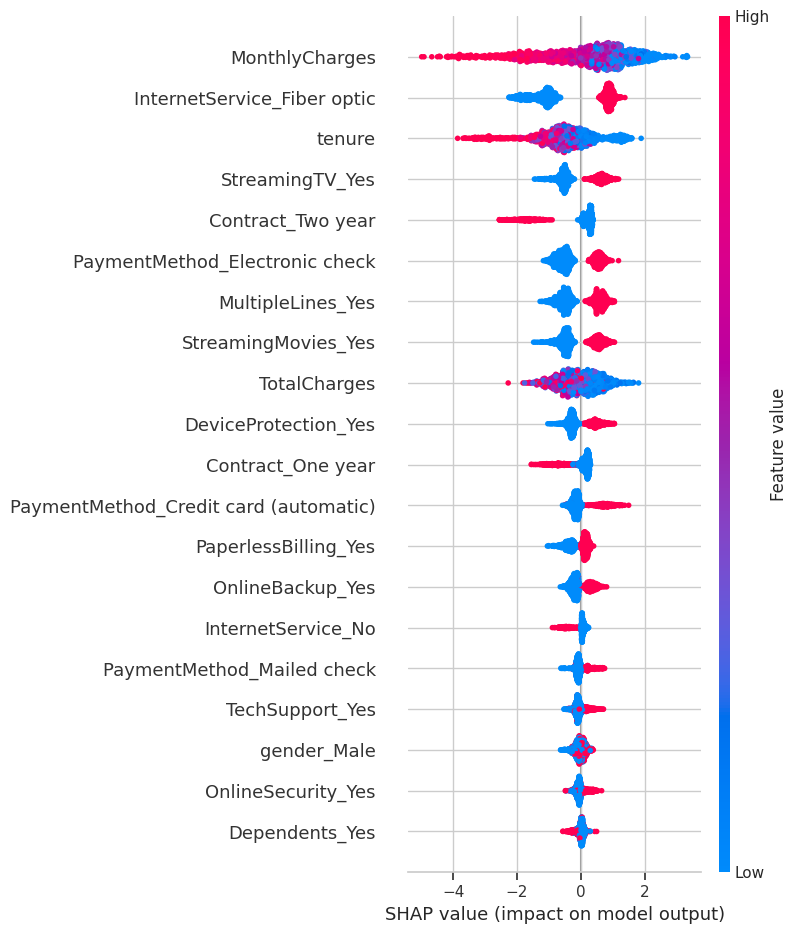

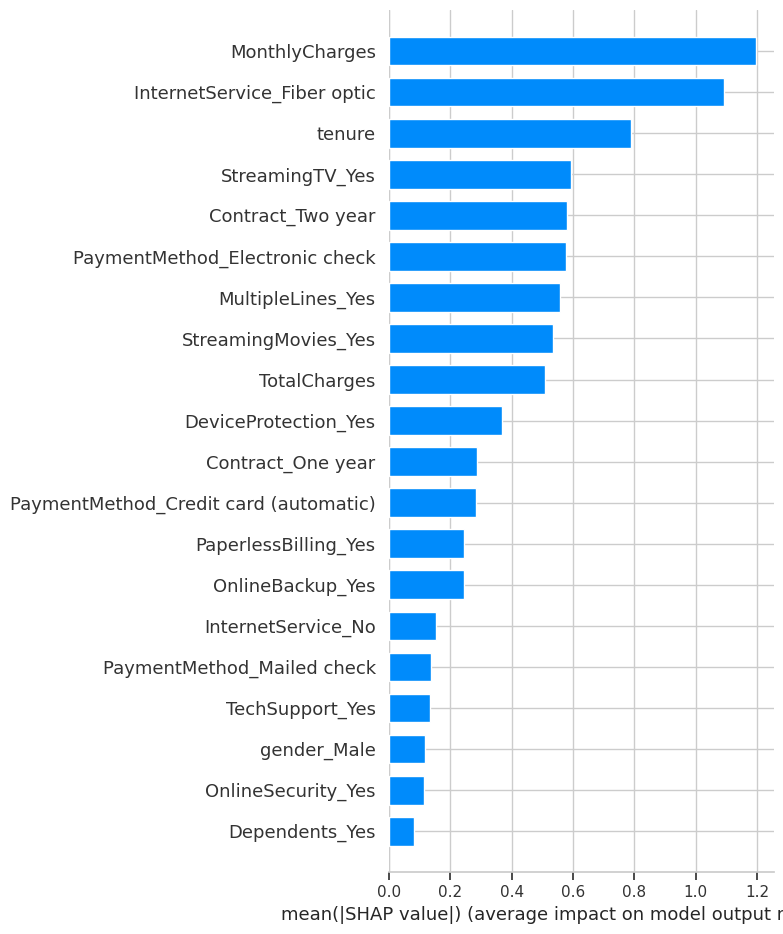

In [46]:
import shap
from xgboost import XGBClassifier

best_params = {
    'subsample': 0.8,
    'n_estimators': 300,
    'min_child_weight': 1,
    'max_depth': 5,
    'learning_rate': 0.2,
    'gamma': 0,
    'colsample_bytree': 0.6
}

xgb_final = XGBClassifier(**best_params, random_state=42)
xgb_final.fit(X_train_smote, y_train_smote)

explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_test)

plt.figure()
shap.summary_plot(shap_values, X_test)
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

Actual Label: 0
Predicted Probability of Churn: 0.84332836


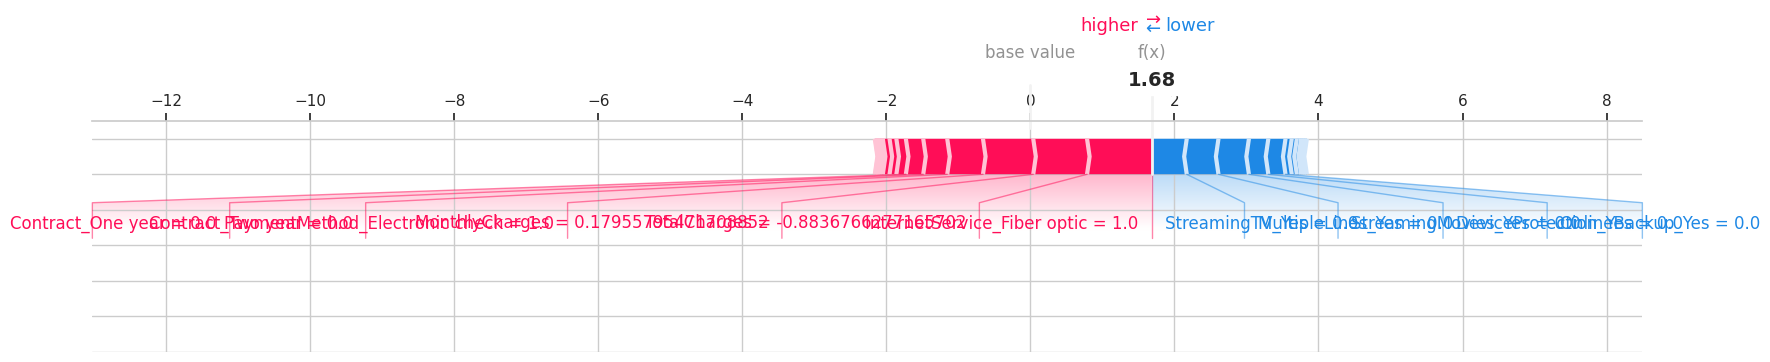

In [47]:
import shap

# Use the final trained model (xgb_final)
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_test)

# Pick a single customer (say index 10)
customer_idx = 10
print("Actual Label:", y_test.iloc[customer_idx])
print("Predicted Probability of Churn:", xgb_final.predict_proba(X_test.iloc[[customer_idx]])[0][1])

# Force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[customer_idx],
    X_test.iloc[customer_idx],
    matplotlib=True
)
